***
    
Demo EvoJAX for PINN (Physics-Informed Neural Network)
    
***

    Version: 2023-03-16
    
    Author : Nicholas Sung Wei Yong, Wong Jian Cheng, Ooi Chin Chun, Abhishek Gupta

    Contain:
    
    1. PINN for solving Korteweg–De Vries equation 
    
    2. Optimize PINN using CMA-ES solver in the EvoJAX framework
       -  as described in Nicholas Sung Wei Yong, Jian Cheng Wong, Pao-Hsiung Chiu, Abhishek Gupta, Chinchun Ooi, Yew-Soon Ong
       "Neuroevolution Surpasses Stochastic Gradient Descent for Physics-Informed Neural Networks" arXiv preprint arXiv:2212.07624 (2022).

# Demo

In [1]:
# choose GPU
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '1'

# import library
import numpy as np
import time

# import problem
from kdv import get_fitness, policy # Number of parameters: 240

CMA Solver

In [2]:
from evojax.algo import CMA_ES_JAX

seed = 1
solver = CMA_ES_JAX(
         pop_size=50, init_stdev=0.05,
         param_size=policy.num_params, seed=seed)

Training

In [3]:
max_iters = 100000
num_tests = 1

loss_ls = []
t_training = []

runtime = 0
train_iters = 0
while (train_iters < max_iters) and (runtime < 60):
    start = time.time()
    # Training.
    params = solver.ask()
    scores = get_fitness(params)
    # Updates the weights through the solver
    solver.tell(fitness=scores)
    # This is the average loss of all the population of parameters
    score_avg_loss = np.mean(np.array(scores, copy=False, subok=True))
    best_params = solver.best_params
    end = time.time()
    t_training.append(end-start)
    loss_ls.append(-1*score_avg_loss)
    # update
    runtime += (end-start)
    train_iters += 1
    # print out
    print ('time = %.2fs  loss = %.2e'%(runtime, loss_ls[-1]))

time = 3.51s  loss = 1.08e-01
time = 4.10s  loss = 1.08e-01
time = 4.11s  loss = 1.06e-01
time = 4.12s  loss = 1.03e-01
time = 4.13s  loss = 9.97e-02
time = 4.13s  loss = 9.44e-02
time = 4.14s  loss = 8.82e-02
time = 4.15s  loss = 8.28e-02
time = 4.16s  loss = 7.63e-02
time = 4.17s  loss = 7.04e-02
time = 4.18s  loss = 6.63e-02
time = 4.19s  loss = 6.31e-02
time = 4.19s  loss = 6.17e-02
time = 4.20s  loss = 6.11e-02
time = 4.21s  loss = 6.17e-02
time = 4.22s  loss = 6.16e-02
time = 4.22s  loss = 6.12e-02
time = 4.23s  loss = 6.16e-02
time = 4.24s  loss = 6.12e-02
time = 4.25s  loss = 6.17e-02
time = 4.25s  loss = 6.13e-02
time = 4.26s  loss = 6.12e-02
time = 4.27s  loss = 6.16e-02
time = 4.27s  loss = 6.12e-02
time = 4.28s  loss = 6.15e-02
time = 4.29s  loss = 6.18e-02
time = 4.30s  loss = 6.16e-02
time = 4.30s  loss = 6.12e-02
time = 4.31s  loss = 6.15e-02
time = 4.32s  loss = 6.16e-02
time = 4.33s  loss = 6.15e-02
time = 4.33s  loss = 6.12e-02
time = 4.34s  loss = 6.17e-02
time = 4.3

time = 6.14s  loss = 1.08e-01
time = 6.15s  loss = 6.67e-02
time = 6.16s  loss = 5.97e-02
time = 6.16s  loss = 8.15e-02
time = 6.17s  loss = 8.23e-02
time = 6.18s  loss = 6.04e-02
time = 6.19s  loss = 6.47e-02
time = 6.19s  loss = 6.76e-02
time = 6.20s  loss = 9.47e-02
time = 6.21s  loss = 6.98e-02
time = 6.21s  loss = 7.10e-02
time = 6.22s  loss = 5.70e-02
time = 6.23s  loss = 5.10e-02
time = 6.24s  loss = 6.95e-02
time = 6.24s  loss = 5.61e-02
time = 6.25s  loss = 5.88e-02
time = 6.26s  loss = 5.45e-02
time = 6.27s  loss = 7.08e-02
time = 6.27s  loss = 7.11e-02
time = 6.28s  loss = 5.04e-02
time = 6.29s  loss = 5.67e-02
time = 6.29s  loss = 6.58e-02
time = 6.30s  loss = 6.48e-02
time = 6.31s  loss = 5.88e-02
time = 6.32s  loss = 6.54e-02
time = 6.32s  loss = 4.97e-02
time = 6.33s  loss = 5.04e-02
time = 6.34s  loss = 6.24e-02
time = 6.35s  loss = 5.73e-02
time = 6.35s  loss = 5.69e-02
time = 6.36s  loss = 6.04e-02
time = 6.37s  loss = 7.34e-02
time = 6.37s  loss = 5.86e-02
time = 6.3

time = 8.17s  loss = 4.59e-02
time = 8.18s  loss = 3.87e-02
time = 8.19s  loss = 4.15e-02
time = 8.20s  loss = 4.93e-02
time = 8.20s  loss = 4.92e-02
time = 8.21s  loss = 4.24e-02
time = 8.22s  loss = 3.60e-02
time = 8.23s  loss = 4.18e-02
time = 8.23s  loss = 3.58e-02
time = 8.24s  loss = 3.54e-02
time = 8.25s  loss = 4.10e-02
time = 8.26s  loss = 3.56e-02
time = 8.26s  loss = 3.68e-02
time = 8.27s  loss = 4.06e-02
time = 8.28s  loss = 4.21e-02
time = 8.28s  loss = 3.61e-02
time = 8.29s  loss = 3.71e-02
time = 8.30s  loss = 3.75e-02
time = 8.31s  loss = 3.42e-02
time = 8.31s  loss = 3.61e-02
time = 8.32s  loss = 3.35e-02
time = 8.33s  loss = 3.38e-02
time = 8.34s  loss = 3.09e-02
time = 8.34s  loss = 3.64e-02
time = 8.35s  loss = 3.10e-02
time = 8.36s  loss = 3.22e-02
time = 8.36s  loss = 3.65e-02
time = 8.37s  loss = 3.42e-02
time = 8.38s  loss = 3.12e-02
time = 8.39s  loss = 3.55e-02
time = 8.39s  loss = 3.15e-02
time = 8.40s  loss = 3.50e-02
time = 8.41s  loss = 2.98e-02
time = 8.4

time = 10.21s  loss = 2.44e-02
time = 10.21s  loss = 2.19e-02
time = 10.22s  loss = 2.62e-02
time = 10.23s  loss = 2.58e-02
time = 10.23s  loss = 2.15e-02
time = 10.24s  loss = 2.54e-02
time = 10.25s  loss = 2.63e-02
time = 10.26s  loss = 2.05e-02
time = 10.26s  loss = 2.28e-02
time = 10.27s  loss = 2.64e-02
time = 10.28s  loss = 2.31e-02
time = 10.29s  loss = 2.22e-02
time = 10.29s  loss = 2.55e-02
time = 10.30s  loss = 2.51e-02
time = 10.31s  loss = 2.22e-02
time = 10.31s  loss = 2.26e-02
time = 10.32s  loss = 2.45e-02
time = 10.33s  loss = 2.84e-02
time = 10.34s  loss = 2.43e-02
time = 10.34s  loss = 2.24e-02
time = 10.35s  loss = 2.46e-02
time = 10.36s  loss = 2.24e-02
time = 10.36s  loss = 2.08e-02
time = 10.37s  loss = 2.58e-02
time = 10.38s  loss = 2.25e-02
time = 10.39s  loss = 2.39e-02
time = 10.39s  loss = 2.60e-02
time = 10.40s  loss = 2.51e-02
time = 10.41s  loss = 2.00e-02
time = 10.42s  loss = 2.36e-02
time = 10.42s  loss = 2.08e-02
time = 10.43s  loss = 1.95e-02
time = 1

time = 12.23s  loss = 1.76e-02
time = 12.24s  loss = 1.79e-02
time = 12.24s  loss = 1.59e-02
time = 12.25s  loss = 1.80e-02
time = 12.26s  loss = 1.73e-02
time = 12.26s  loss = 1.68e-02
time = 12.27s  loss = 1.71e-02
time = 12.28s  loss = 1.53e-02
time = 12.29s  loss = 1.61e-02
time = 12.29s  loss = 1.42e-02
time = 12.30s  loss = 1.51e-02
time = 12.31s  loss = 1.79e-02
time = 12.32s  loss = 1.53e-02
time = 12.32s  loss = 1.50e-02
time = 12.33s  loss = 1.76e-02
time = 12.34s  loss = 1.74e-02
time = 12.34s  loss = 1.81e-02
time = 12.35s  loss = 1.59e-02
time = 12.36s  loss = 1.60e-02
time = 12.37s  loss = 1.68e-02
time = 12.37s  loss = 1.66e-02
time = 12.38s  loss = 1.63e-02
time = 12.39s  loss = 1.93e-02
time = 12.39s  loss = 1.73e-02
time = 12.40s  loss = 1.79e-02
time = 12.41s  loss = 1.88e-02
time = 12.42s  loss = 1.99e-02
time = 12.42s  loss = 1.70e-02
time = 12.43s  loss = 1.65e-02
time = 12.44s  loss = 1.62e-02
time = 12.45s  loss = 1.76e-02
time = 12.45s  loss = 1.66e-02
time = 1

time = 14.26s  loss = 1.07e-02
time = 14.26s  loss = 1.22e-02
time = 14.27s  loss = 1.04e-02
time = 14.28s  loss = 1.05e-02
time = 14.29s  loss = 9.84e-03
time = 14.29s  loss = 1.02e-02
time = 14.30s  loss = 1.03e-02
time = 14.31s  loss = 1.02e-02
time = 14.31s  loss = 1.09e-02
time = 14.32s  loss = 9.66e-03
time = 14.33s  loss = 1.17e-02
time = 14.34s  loss = 1.13e-02
time = 14.34s  loss = 1.07e-02
time = 14.35s  loss = 1.13e-02
time = 14.36s  loss = 1.05e-02
time = 14.37s  loss = 1.06e-02
time = 14.37s  loss = 1.02e-02
time = 14.38s  loss = 9.61e-03
time = 14.39s  loss = 1.09e-02
time = 14.39s  loss = 9.95e-03
time = 14.40s  loss = 1.18e-02
time = 14.41s  loss = 1.07e-02
time = 14.42s  loss = 1.02e-02
time = 14.42s  loss = 1.06e-02
time = 14.43s  loss = 1.02e-02
time = 14.44s  loss = 9.66e-03
time = 14.45s  loss = 1.11e-02
time = 14.45s  loss = 1.03e-02
time = 14.46s  loss = 1.00e-02
time = 14.47s  loss = 9.91e-03
time = 14.48s  loss = 9.08e-03
time = 14.48s  loss = 9.56e-03
time = 1

time = 16.27s  loss = 7.50e-03
time = 16.28s  loss = 6.64e-03
time = 16.29s  loss = 7.37e-03
time = 16.30s  loss = 7.04e-03
time = 16.30s  loss = 6.70e-03
time = 16.31s  loss = 7.17e-03
time = 16.32s  loss = 6.80e-03
time = 16.32s  loss = 6.77e-03
time = 16.33s  loss = 6.77e-03
time = 16.34s  loss = 7.75e-03
time = 16.35s  loss = 6.68e-03
time = 16.35s  loss = 6.77e-03
time = 16.36s  loss = 7.19e-03
time = 16.37s  loss = 7.42e-03
time = 16.37s  loss = 6.92e-03
time = 16.38s  loss = 6.99e-03
time = 16.39s  loss = 6.82e-03
time = 16.40s  loss = 6.67e-03
time = 16.40s  loss = 6.93e-03
time = 16.41s  loss = 6.53e-03
time = 16.42s  loss = 6.72e-03
time = 16.42s  loss = 6.66e-03
time = 16.43s  loss = 7.01e-03
time = 16.44s  loss = 6.87e-03
time = 16.45s  loss = 6.66e-03
time = 16.45s  loss = 6.28e-03
time = 16.46s  loss = 6.74e-03
time = 16.47s  loss = 6.47e-03
time = 16.48s  loss = 6.57e-03
time = 16.48s  loss = 6.94e-03
time = 16.49s  loss = 6.34e-03
time = 16.50s  loss = 6.53e-03
time = 1

time = 18.30s  loss = 5.22e-03
time = 18.31s  loss = 5.23e-03
time = 18.32s  loss = 5.84e-03
time = 18.33s  loss = 5.27e-03
time = 18.33s  loss = 5.28e-03
time = 18.34s  loss = 5.52e-03
time = 18.35s  loss = 5.33e-03
time = 18.35s  loss = 5.05e-03
time = 18.36s  loss = 5.23e-03
time = 18.37s  loss = 5.33e-03
time = 18.38s  loss = 5.45e-03
time = 18.39s  loss = 5.39e-03
time = 18.40s  loss = 4.98e-03
time = 18.40s  loss = 4.87e-03
time = 18.41s  loss = 5.24e-03
time = 18.42s  loss = 5.15e-03
time = 18.42s  loss = 4.87e-03
time = 18.43s  loss = 5.26e-03
time = 18.44s  loss = 5.18e-03
time = 18.45s  loss = 5.06e-03
time = 18.45s  loss = 5.49e-03
time = 18.46s  loss = 4.89e-03
time = 18.47s  loss = 5.07e-03
time = 18.47s  loss = 4.99e-03
time = 18.48s  loss = 5.38e-03
time = 18.49s  loss = 5.21e-03
time = 18.50s  loss = 5.13e-03
time = 18.50s  loss = 5.22e-03
time = 18.51s  loss = 5.05e-03
time = 18.52s  loss = 5.16e-03
time = 18.53s  loss = 5.21e-03
time = 18.53s  loss = 4.81e-03
time = 1

time = 20.33s  loss = 4.09e-03
time = 20.34s  loss = 4.06e-03
time = 20.34s  loss = 4.05e-03
time = 20.35s  loss = 3.99e-03
time = 20.36s  loss = 4.06e-03
time = 20.36s  loss = 4.16e-03
time = 20.37s  loss = 4.22e-03
time = 20.38s  loss = 4.23e-03
time = 20.39s  loss = 4.21e-03
time = 20.39s  loss = 3.98e-03
time = 20.40s  loss = 4.15e-03
time = 20.41s  loss = 3.84e-03
time = 20.41s  loss = 3.95e-03
time = 20.42s  loss = 4.03e-03
time = 20.43s  loss = 4.09e-03
time = 20.44s  loss = 3.90e-03
time = 20.44s  loss = 3.87e-03
time = 20.45s  loss = 4.07e-03
time = 20.46s  loss = 3.94e-03
time = 20.47s  loss = 3.88e-03
time = 20.47s  loss = 3.99e-03
time = 20.48s  loss = 3.84e-03
time = 20.49s  loss = 3.83e-03
time = 20.49s  loss = 4.03e-03
time = 20.50s  loss = 3.92e-03
time = 20.51s  loss = 4.05e-03
time = 20.52s  loss = 3.82e-03
time = 20.52s  loss = 3.81e-03
time = 20.53s  loss = 3.98e-03
time = 20.54s  loss = 3.91e-03
time = 20.54s  loss = 4.05e-03
time = 20.55s  loss = 3.67e-03
time = 2

time = 22.35s  loss = 2.88e-03
time = 22.36s  loss = 3.04e-03
time = 22.37s  loss = 2.83e-03
time = 22.38s  loss = 3.03e-03
time = 22.38s  loss = 2.88e-03
time = 22.39s  loss = 2.85e-03
time = 22.40s  loss = 3.00e-03
time = 22.41s  loss = 2.89e-03
time = 22.41s  loss = 2.98e-03
time = 22.42s  loss = 3.05e-03
time = 22.43s  loss = 2.85e-03
time = 22.43s  loss = 2.86e-03
time = 22.44s  loss = 2.83e-03
time = 22.45s  loss = 2.89e-03
time = 22.46s  loss = 2.95e-03
time = 22.46s  loss = 2.92e-03
time = 22.47s  loss = 2.88e-03
time = 22.48s  loss = 3.02e-03
time = 22.48s  loss = 2.88e-03
time = 22.49s  loss = 2.87e-03
time = 22.50s  loss = 2.87e-03
time = 22.51s  loss = 2.89e-03
time = 22.51s  loss = 3.05e-03
time = 22.52s  loss = 2.92e-03
time = 22.53s  loss = 2.97e-03
time = 22.54s  loss = 2.93e-03
time = 22.54s  loss = 2.94e-03
time = 22.55s  loss = 2.95e-03
time = 22.56s  loss = 2.92e-03
time = 22.56s  loss = 2.99e-03
time = 22.57s  loss = 2.89e-03
time = 22.58s  loss = 2.88e-03
time = 2

time = 24.38s  loss = 2.35e-03
time = 24.38s  loss = 2.24e-03
time = 24.39s  loss = 2.27e-03
time = 24.40s  loss = 2.26e-03
time = 24.41s  loss = 2.28e-03
time = 24.41s  loss = 2.30e-03
time = 24.42s  loss = 2.23e-03
time = 24.43s  loss = 2.25e-03
time = 24.43s  loss = 2.23e-03
time = 24.44s  loss = 2.28e-03
time = 24.45s  loss = 2.29e-03
time = 24.46s  loss = 2.26e-03
time = 24.46s  loss = 2.22e-03
time = 24.47s  loss = 2.19e-03
time = 24.48s  loss = 2.14e-03
time = 24.49s  loss = 2.21e-03
time = 24.50s  loss = 2.19e-03
time = 24.50s  loss = 2.24e-03
time = 24.51s  loss = 2.18e-03
time = 24.52s  loss = 2.14e-03
time = 24.53s  loss = 2.17e-03
time = 24.53s  loss = 2.15e-03
time = 24.54s  loss = 2.22e-03
time = 24.55s  loss = 2.16e-03
time = 24.55s  loss = 2.15e-03
time = 24.56s  loss = 2.18e-03
time = 24.57s  loss = 2.12e-03
time = 24.58s  loss = 2.16e-03
time = 24.58s  loss = 2.14e-03
time = 24.59s  loss = 2.13e-03
time = 24.60s  loss = 2.15e-03
time = 24.60s  loss = 2.11e-03
time = 2

time = 26.41s  loss = 2.02e-03
time = 26.42s  loss = 1.99e-03
time = 26.42s  loss = 2.04e-03
time = 26.43s  loss = 2.03e-03
time = 26.44s  loss = 1.96e-03
time = 26.44s  loss = 2.02e-03
time = 26.45s  loss = 2.01e-03
time = 26.46s  loss = 1.97e-03
time = 26.47s  loss = 1.96e-03
time = 26.47s  loss = 2.00e-03
time = 26.48s  loss = 1.97e-03
time = 26.49s  loss = 1.98e-03
time = 26.49s  loss = 2.03e-03
time = 26.50s  loss = 2.02e-03
time = 26.51s  loss = 1.99e-03
time = 26.52s  loss = 1.98e-03
time = 26.52s  loss = 1.94e-03
time = 26.53s  loss = 1.94e-03
time = 26.54s  loss = 1.96e-03
time = 26.55s  loss = 1.93e-03
time = 26.55s  loss = 1.97e-03
time = 26.56s  loss = 1.91e-03
time = 26.57s  loss = 1.98e-03
time = 26.57s  loss = 1.95e-03
time = 26.58s  loss = 1.87e-03
time = 26.59s  loss = 1.95e-03
time = 26.60s  loss = 1.90e-03
time = 26.60s  loss = 1.90e-03
time = 26.61s  loss = 1.91e-03
time = 26.62s  loss = 1.92e-03
time = 26.62s  loss = 1.89e-03
time = 26.63s  loss = 1.93e-03
time = 2

time = 28.45s  loss = 1.61e-03
time = 28.45s  loss = 1.62e-03
time = 28.46s  loss = 1.63e-03
time = 28.47s  loss = 1.62e-03
time = 28.47s  loss = 1.58e-03
time = 28.48s  loss = 1.55e-03
time = 28.49s  loss = 1.58e-03
time = 28.50s  loss = 1.60e-03
time = 28.50s  loss = 1.58e-03
time = 28.51s  loss = 1.57e-03
time = 28.52s  loss = 1.58e-03
time = 28.53s  loss = 1.61e-03
time = 28.53s  loss = 1.57e-03
time = 28.54s  loss = 1.58e-03
time = 28.55s  loss = 1.56e-03
time = 28.55s  loss = 1.58e-03
time = 28.56s  loss = 1.56e-03
time = 28.57s  loss = 1.58e-03
time = 28.58s  loss = 1.55e-03
time = 28.58s  loss = 1.59e-03
time = 28.59s  loss = 1.57e-03
time = 28.60s  loss = 1.57e-03
time = 28.60s  loss = 1.57e-03
time = 28.61s  loss = 1.55e-03
time = 28.62s  loss = 1.53e-03
time = 28.63s  loss = 1.54e-03
time = 28.63s  loss = 1.59e-03
time = 28.64s  loss = 1.56e-03
time = 28.65s  loss = 1.55e-03
time = 28.66s  loss = 1.52e-03
time = 28.66s  loss = 1.55e-03
time = 28.67s  loss = 1.55e-03
time = 2

time = 30.47s  loss = 1.23e-03
time = 30.48s  loss = 1.22e-03
time = 30.49s  loss = 1.21e-03
time = 30.49s  loss = 1.21e-03
time = 30.50s  loss = 1.21e-03
time = 30.51s  loss = 1.25e-03
time = 30.51s  loss = 1.23e-03
time = 30.52s  loss = 1.22e-03
time = 30.53s  loss = 1.20e-03
time = 30.54s  loss = 1.21e-03
time = 30.54s  loss = 1.20e-03
time = 30.55s  loss = 1.21e-03
time = 30.56s  loss = 1.20e-03
time = 30.57s  loss = 1.21e-03
time = 30.57s  loss = 1.23e-03
time = 30.58s  loss = 1.19e-03
time = 30.59s  loss = 1.23e-03
time = 30.59s  loss = 1.21e-03
time = 30.60s  loss = 1.22e-03
time = 30.61s  loss = 1.22e-03
time = 30.62s  loss = 1.21e-03
time = 30.62s  loss = 1.20e-03
time = 30.63s  loss = 1.20e-03
time = 30.64s  loss = 1.24e-03
time = 30.64s  loss = 1.21e-03
time = 30.65s  loss = 1.22e-03
time = 30.66s  loss = 1.19e-03
time = 30.67s  loss = 1.19e-03
time = 30.67s  loss = 1.17e-03
time = 30.68s  loss = 1.20e-03
time = 30.69s  loss = 1.23e-03
time = 30.70s  loss = 1.18e-03
time = 3

time = 32.51s  loss = 9.55e-04
time = 32.52s  loss = 9.40e-04
time = 32.53s  loss = 9.36e-04
time = 32.53s  loss = 9.51e-04
time = 32.54s  loss = 9.55e-04
time = 32.55s  loss = 9.41e-04
time = 32.56s  loss = 9.47e-04
time = 32.56s  loss = 9.45e-04
time = 32.57s  loss = 9.60e-04
time = 32.58s  loss = 9.51e-04
time = 32.58s  loss = 9.32e-04
time = 32.59s  loss = 9.47e-04
time = 32.60s  loss = 9.53e-04
time = 32.61s  loss = 9.35e-04
time = 32.61s  loss = 9.18e-04
time = 32.62s  loss = 9.18e-04
time = 32.63s  loss = 9.38e-04
time = 32.63s  loss = 9.28e-04
time = 32.64s  loss = 9.41e-04
time = 32.65s  loss = 9.30e-04
time = 32.66s  loss = 9.36e-04
time = 32.66s  loss = 9.25e-04
time = 32.67s  loss = 9.17e-04
time = 32.68s  loss = 9.32e-04
time = 32.69s  loss = 9.24e-04
time = 32.69s  loss = 9.27e-04
time = 32.70s  loss = 9.44e-04
time = 32.71s  loss = 9.25e-04
time = 32.71s  loss = 9.20e-04
time = 32.72s  loss = 9.25e-04
time = 32.73s  loss = 9.10e-04
time = 32.74s  loss = 9.08e-04
time = 3

time = 34.54s  loss = 7.38e-04
time = 34.55s  loss = 7.37e-04
time = 34.56s  loss = 7.33e-04
time = 34.57s  loss = 7.38e-04
time = 34.57s  loss = 7.30e-04
time = 34.58s  loss = 7.28e-04
time = 34.59s  loss = 7.35e-04
time = 34.59s  loss = 7.37e-04
time = 34.60s  loss = 7.44e-04
time = 34.61s  loss = 7.31e-04
time = 34.62s  loss = 7.26e-04
time = 34.62s  loss = 7.26e-04
time = 34.63s  loss = 7.25e-04
time = 34.64s  loss = 7.19e-04
time = 34.65s  loss = 7.26e-04
time = 34.65s  loss = 7.20e-04
time = 34.66s  loss = 7.29e-04
time = 34.67s  loss = 7.27e-04
time = 34.67s  loss = 7.27e-04
time = 34.68s  loss = 7.21e-04
time = 34.69s  loss = 7.18e-04
time = 34.70s  loss = 7.15e-04
time = 34.70s  loss = 7.18e-04
time = 34.71s  loss = 7.28e-04
time = 34.72s  loss = 7.09e-04
time = 34.73s  loss = 7.25e-04
time = 34.73s  loss = 7.19e-04
time = 34.74s  loss = 7.11e-04
time = 34.75s  loss = 7.11e-04
time = 34.75s  loss = 7.22e-04
time = 34.76s  loss = 7.17e-04
time = 34.77s  loss = 7.27e-04
time = 3

time = 36.58s  loss = 5.80e-04
time = 36.59s  loss = 5.86e-04
time = 36.60s  loss = 5.67e-04
time = 36.61s  loss = 5.67e-04
time = 36.61s  loss = 5.73e-04
time = 36.62s  loss = 5.90e-04
time = 36.63s  loss = 5.78e-04
time = 36.63s  loss = 5.67e-04
time = 36.64s  loss = 5.86e-04
time = 36.65s  loss = 5.73e-04
time = 36.66s  loss = 5.64e-04
time = 36.66s  loss = 5.72e-04
time = 36.67s  loss = 5.75e-04
time = 36.68s  loss = 5.78e-04
time = 36.69s  loss = 5.74e-04
time = 36.69s  loss = 5.79e-04
time = 36.70s  loss = 5.87e-04
time = 36.71s  loss = 5.66e-04
time = 36.71s  loss = 5.66e-04
time = 36.72s  loss = 5.66e-04
time = 36.73s  loss = 5.65e-04
time = 36.74s  loss = 5.73e-04
time = 36.74s  loss = 5.63e-04
time = 36.75s  loss = 5.76e-04
time = 36.76s  loss = 5.71e-04
time = 36.77s  loss = 5.59e-04
time = 36.78s  loss = 5.60e-04
time = 36.78s  loss = 5.58e-04
time = 36.79s  loss = 5.66e-04
time = 36.80s  loss = 5.62e-04
time = 36.80s  loss = 5.59e-04
time = 36.81s  loss = 5.62e-04
time = 3

time = 38.61s  loss = 4.40e-04
time = 38.62s  loss = 4.35e-04
time = 38.63s  loss = 4.36e-04
time = 38.63s  loss = 4.34e-04
time = 38.64s  loss = 4.35e-04
time = 38.65s  loss = 4.41e-04
time = 38.66s  loss = 4.38e-04
time = 38.66s  loss = 4.36e-04
time = 38.67s  loss = 4.31e-04
time = 38.68s  loss = 4.41e-04
time = 38.68s  loss = 4.48e-04
time = 38.69s  loss = 4.34e-04
time = 38.70s  loss = 4.38e-04
time = 38.71s  loss = 4.32e-04
time = 38.71s  loss = 4.37e-04
time = 38.72s  loss = 4.32e-04
time = 38.73s  loss = 4.32e-04
time = 38.74s  loss = 4.38e-04
time = 38.74s  loss = 4.35e-04
time = 38.75s  loss = 4.41e-04
time = 38.76s  loss = 4.33e-04
time = 38.76s  loss = 4.35e-04
time = 38.77s  loss = 4.39e-04
time = 38.78s  loss = 4.33e-04
time = 38.79s  loss = 4.39e-04
time = 38.79s  loss = 4.31e-04
time = 38.80s  loss = 4.24e-04
time = 38.81s  loss = 4.28e-04
time = 38.81s  loss = 4.28e-04
time = 38.82s  loss = 4.30e-04
time = 38.83s  loss = 4.28e-04
time = 38.84s  loss = 4.29e-04
time = 3

time = 40.63s  loss = 3.50e-04
time = 40.64s  loss = 3.54e-04
time = 40.65s  loss = 3.50e-04
time = 40.66s  loss = 3.55e-04
time = 40.66s  loss = 3.54e-04
time = 40.67s  loss = 3.49e-04
time = 40.68s  loss = 3.47e-04
time = 40.69s  loss = 3.49e-04
time = 40.69s  loss = 3.45e-04
time = 40.70s  loss = 3.50e-04
time = 40.71s  loss = 3.50e-04
time = 40.72s  loss = 3.54e-04
time = 40.72s  loss = 3.51e-04
time = 40.73s  loss = 3.50e-04
time = 40.74s  loss = 3.42e-04
time = 40.74s  loss = 3.44e-04
time = 40.75s  loss = 3.50e-04
time = 40.76s  loss = 3.42e-04
time = 40.77s  loss = 3.49e-04
time = 40.77s  loss = 3.43e-04
time = 40.78s  loss = 3.41e-04
time = 40.79s  loss = 3.45e-04
time = 40.80s  loss = 3.43e-04
time = 40.80s  loss = 3.40e-04
time = 40.81s  loss = 3.41e-04
time = 40.82s  loss = 3.46e-04
time = 40.82s  loss = 3.40e-04
time = 40.83s  loss = 3.40e-04
time = 40.84s  loss = 3.38e-04
time = 40.85s  loss = 3.41e-04
time = 40.85s  loss = 3.38e-04
time = 40.86s  loss = 3.41e-04
time = 4

time = 42.68s  loss = 2.94e-04
time = 42.69s  loss = 2.89e-04
time = 42.70s  loss = 2.93e-04
time = 42.71s  loss = 2.96e-04
time = 42.71s  loss = 2.92e-04
time = 42.72s  loss = 2.89e-04
time = 42.73s  loss = 2.89e-04
time = 42.74s  loss = 2.88e-04
time = 42.74s  loss = 2.91e-04
time = 42.75s  loss = 2.90e-04
time = 42.76s  loss = 2.91e-04
time = 42.76s  loss = 2.88e-04
time = 42.77s  loss = 2.94e-04
time = 42.78s  loss = 2.92e-04
time = 42.79s  loss = 2.82e-04
time = 42.79s  loss = 2.82e-04
time = 42.80s  loss = 2.85e-04
time = 42.81s  loss = 2.87e-04
time = 42.82s  loss = 2.85e-04
time = 42.82s  loss = 2.90e-04
time = 42.83s  loss = 2.86e-04
time = 42.84s  loss = 2.84e-04
time = 42.84s  loss = 2.88e-04
time = 42.85s  loss = 2.84e-04
time = 42.86s  loss = 2.90e-04
time = 42.87s  loss = 2.82e-04
time = 42.87s  loss = 2.83e-04
time = 42.88s  loss = 2.82e-04
time = 42.89s  loss = 2.78e-04
time = 42.90s  loss = 2.84e-04
time = 42.91s  loss = 2.83e-04
time = 42.91s  loss = 2.85e-04
time = 4

time = 44.73s  loss = 2.50e-04
time = 44.74s  loss = 2.45e-04
time = 44.74s  loss = 2.43e-04
time = 44.75s  loss = 2.48e-04
time = 44.76s  loss = 2.49e-04
time = 44.76s  loss = 2.41e-04
time = 44.77s  loss = 2.48e-04
time = 44.78s  loss = 2.43e-04
time = 44.79s  loss = 2.43e-04
time = 44.79s  loss = 2.46e-04
time = 44.80s  loss = 2.49e-04
time = 44.81s  loss = 2.42e-04
time = 44.81s  loss = 2.37e-04
time = 44.82s  loss = 2.42e-04
time = 44.83s  loss = 2.41e-04
time = 44.84s  loss = 2.47e-04
time = 44.84s  loss = 2.48e-04
time = 44.85s  loss = 2.35e-04
time = 44.86s  loss = 2.45e-04
time = 44.87s  loss = 2.33e-04
time = 44.87s  loss = 2.38e-04
time = 44.88s  loss = 2.44e-04
time = 44.89s  loss = 2.41e-04
time = 44.89s  loss = 2.32e-04
time = 44.90s  loss = 2.37e-04
time = 44.91s  loss = 2.35e-04
time = 44.92s  loss = 2.34e-04
time = 44.92s  loss = 2.36e-04
time = 44.93s  loss = 2.34e-04
time = 44.94s  loss = 2.43e-04
time = 44.94s  loss = 2.31e-04
time = 44.95s  loss = 2.31e-04
time = 4

time = 46.76s  loss = 1.95e-04
time = 46.77s  loss = 1.89e-04
time = 46.77s  loss = 1.91e-04
time = 46.78s  loss = 1.94e-04
time = 46.79s  loss = 1.90e-04
time = 46.79s  loss = 1.98e-04
time = 46.80s  loss = 1.91e-04
time = 46.81s  loss = 1.91e-04
time = 46.82s  loss = 1.95e-04
time = 46.82s  loss = 1.96e-04
time = 46.83s  loss = 1.94e-04
time = 46.84s  loss = 1.92e-04
time = 46.85s  loss = 1.90e-04
time = 46.85s  loss = 1.91e-04
time = 46.86s  loss = 1.91e-04
time = 46.87s  loss = 1.89e-04
time = 46.87s  loss = 1.92e-04
time = 46.88s  loss = 1.96e-04
time = 46.89s  loss = 1.92e-04
time = 46.90s  loss = 1.89e-04
time = 46.90s  loss = 1.88e-04
time = 46.91s  loss = 1.89e-04
time = 46.92s  loss = 1.89e-04
time = 46.92s  loss = 1.90e-04
time = 46.93s  loss = 1.91e-04
time = 46.94s  loss = 1.88e-04
time = 46.95s  loss = 1.88e-04
time = 46.95s  loss = 1.92e-04
time = 46.96s  loss = 1.91e-04
time = 46.97s  loss = 1.91e-04
time = 46.98s  loss = 1.90e-04
time = 46.98s  loss = 1.90e-04
time = 4

time = 48.79s  loss = 1.64e-04
time = 48.80s  loss = 1.61e-04
time = 48.81s  loss = 1.67e-04
time = 48.81s  loss = 1.69e-04
time = 48.82s  loss = 1.66e-04
time = 48.83s  loss = 1.64e-04
time = 48.84s  loss = 1.64e-04
time = 48.84s  loss = 1.65e-04
time = 48.85s  loss = 1.65e-04
time = 48.86s  loss = 1.68e-04
time = 48.87s  loss = 1.69e-04
time = 48.87s  loss = 1.65e-04
time = 48.88s  loss = 1.67e-04
time = 48.89s  loss = 1.69e-04
time = 48.90s  loss = 1.67e-04
time = 48.91s  loss = 1.68e-04
time = 48.91s  loss = 1.63e-04
time = 48.92s  loss = 1.65e-04
time = 48.93s  loss = 1.65e-04
time = 48.94s  loss = 1.63e-04
time = 48.94s  loss = 1.69e-04
time = 48.95s  loss = 1.67e-04
time = 48.96s  loss = 1.63e-04
time = 48.97s  loss = 1.67e-04
time = 48.97s  loss = 1.65e-04
time = 48.98s  loss = 1.66e-04
time = 48.99s  loss = 1.66e-04
time = 48.99s  loss = 1.65e-04
time = 49.00s  loss = 1.65e-04
time = 49.01s  loss = 1.65e-04
time = 49.02s  loss = 1.65e-04
time = 49.02s  loss = 1.67e-04
time = 4

time = 50.82s  loss = 1.44e-04
time = 50.83s  loss = 1.43e-04
time = 50.84s  loss = 1.44e-04
time = 50.85s  loss = 1.43e-04
time = 50.85s  loss = 1.43e-04
time = 50.86s  loss = 1.43e-04
time = 50.87s  loss = 1.43e-04
time = 50.87s  loss = 1.45e-04
time = 50.88s  loss = 1.44e-04
time = 50.89s  loss = 1.43e-04
time = 50.90s  loss = 1.46e-04
time = 50.90s  loss = 1.45e-04
time = 50.91s  loss = 1.43e-04
time = 50.92s  loss = 1.42e-04
time = 50.93s  loss = 1.42e-04
time = 50.93s  loss = 1.42e-04
time = 50.94s  loss = 1.43e-04
time = 50.95s  loss = 1.43e-04
time = 50.95s  loss = 1.44e-04
time = 50.96s  loss = 1.44e-04
time = 50.97s  loss = 1.44e-04
time = 50.98s  loss = 1.45e-04
time = 50.98s  loss = 1.41e-04
time = 50.99s  loss = 1.42e-04
time = 51.00s  loss = 1.42e-04
time = 51.01s  loss = 1.42e-04
time = 51.01s  loss = 1.41e-04
time = 51.02s  loss = 1.41e-04
time = 51.03s  loss = 1.42e-04
time = 51.03s  loss = 1.42e-04
time = 51.04s  loss = 1.40e-04
time = 51.05s  loss = 1.40e-04
time = 5

time = 52.86s  loss = 1.29e-04
time = 52.87s  loss = 1.28e-04
time = 52.87s  loss = 1.29e-04
time = 52.88s  loss = 1.27e-04
time = 52.89s  loss = 1.28e-04
time = 52.90s  loss = 1.29e-04
time = 52.90s  loss = 1.29e-04
time = 52.91s  loss = 1.29e-04
time = 52.92s  loss = 1.29e-04
time = 52.93s  loss = 1.30e-04
time = 52.93s  loss = 1.29e-04
time = 52.94s  loss = 1.29e-04
time = 52.95s  loss = 1.30e-04
time = 52.96s  loss = 1.30e-04
time = 52.96s  loss = 1.30e-04
time = 52.97s  loss = 1.29e-04
time = 52.98s  loss = 1.28e-04
time = 52.99s  loss = 1.30e-04
time = 52.99s  loss = 1.28e-04
time = 53.00s  loss = 1.29e-04
time = 53.01s  loss = 1.28e-04
time = 53.01s  loss = 1.29e-04
time = 53.02s  loss = 1.28e-04
time = 53.03s  loss = 1.29e-04
time = 53.04s  loss = 1.28e-04
time = 53.05s  loss = 1.29e-04
time = 53.05s  loss = 1.29e-04
time = 53.06s  loss = 1.29e-04
time = 53.07s  loss = 1.28e-04
time = 53.08s  loss = 1.29e-04
time = 53.08s  loss = 1.29e-04
time = 53.09s  loss = 1.28e-04
time = 5

time = 54.89s  loss = 1.18e-04
time = 54.90s  loss = 1.18e-04
time = 54.91s  loss = 1.17e-04
time = 54.91s  loss = 1.17e-04
time = 54.92s  loss = 1.17e-04
time = 54.93s  loss = 1.18e-04
time = 54.94s  loss = 1.17e-04
time = 54.94s  loss = 1.17e-04
time = 54.95s  loss = 1.17e-04
time = 54.96s  loss = 1.18e-04
time = 54.96s  loss = 1.17e-04
time = 54.97s  loss = 1.17e-04
time = 54.98s  loss = 1.17e-04
time = 54.99s  loss = 1.18e-04
time = 54.99s  loss = 1.17e-04
time = 55.00s  loss = 1.17e-04
time = 55.01s  loss = 1.18e-04
time = 55.01s  loss = 1.17e-04
time = 55.02s  loss = 1.17e-04
time = 55.03s  loss = 1.17e-04
time = 55.04s  loss = 1.17e-04
time = 55.05s  loss = 1.18e-04
time = 55.05s  loss = 1.17e-04
time = 55.06s  loss = 1.17e-04
time = 55.07s  loss = 1.16e-04
time = 55.08s  loss = 1.17e-04
time = 55.08s  loss = 1.16e-04
time = 55.09s  loss = 1.17e-04
time = 55.10s  loss = 1.16e-04
time = 55.10s  loss = 1.16e-04
time = 55.11s  loss = 1.17e-04
time = 55.12s  loss = 1.17e-04
time = 5

time = 56.93s  loss = 1.09e-04
time = 56.94s  loss = 1.09e-04
time = 56.94s  loss = 1.09e-04
time = 56.95s  loss = 1.09e-04
time = 56.96s  loss = 1.10e-04
time = 56.96s  loss = 1.10e-04
time = 56.97s  loss = 1.10e-04
time = 56.98s  loss = 1.10e-04
time = 56.99s  loss = 1.10e-04
time = 56.99s  loss = 1.09e-04
time = 57.00s  loss = 1.10e-04
time = 57.01s  loss = 1.09e-04
time = 57.02s  loss = 1.10e-04
time = 57.02s  loss = 1.09e-04
time = 57.03s  loss = 1.09e-04
time = 57.04s  loss = 1.09e-04
time = 57.04s  loss = 1.10e-04
time = 57.05s  loss = 1.09e-04
time = 57.06s  loss = 1.10e-04
time = 57.07s  loss = 1.09e-04
time = 57.08s  loss = 1.10e-04
time = 57.08s  loss = 1.09e-04
time = 57.09s  loss = 1.09e-04
time = 57.10s  loss = 1.09e-04
time = 57.11s  loss = 1.09e-04
time = 57.11s  loss = 1.09e-04
time = 57.12s  loss = 1.08e-04
time = 57.13s  loss = 1.10e-04
time = 57.13s  loss = 1.09e-04
time = 57.14s  loss = 1.09e-04
time = 57.15s  loss = 1.09e-04
time = 57.16s  loss = 1.09e-04
time = 5

time = 58.97s  loss = 1.04e-04
time = 58.98s  loss = 1.04e-04
time = 58.98s  loss = 1.04e-04
time = 58.99s  loss = 1.04e-04
time = 59.00s  loss = 1.04e-04
time = 59.01s  loss = 1.04e-04
time = 59.01s  loss = 1.04e-04
time = 59.02s  loss = 1.04e-04
time = 59.03s  loss = 1.03e-04
time = 59.04s  loss = 1.04e-04
time = 59.04s  loss = 1.03e-04
time = 59.05s  loss = 1.04e-04
time = 59.06s  loss = 1.03e-04
time = 59.06s  loss = 1.03e-04
time = 59.07s  loss = 1.04e-04
time = 59.08s  loss = 1.03e-04
time = 59.09s  loss = 1.03e-04
time = 59.09s  loss = 1.03e-04
time = 59.10s  loss = 1.03e-04
time = 59.11s  loss = 1.03e-04
time = 59.12s  loss = 1.03e-04
time = 59.12s  loss = 1.03e-04
time = 59.13s  loss = 1.03e-04
time = 59.14s  loss = 1.03e-04
time = 59.14s  loss = 1.03e-04
time = 59.15s  loss = 1.04e-04
time = 59.16s  loss = 1.04e-04
time = 59.17s  loss = 1.04e-04
time = 59.17s  loss = 1.03e-04
time = 59.18s  loss = 1.03e-04
time = 59.19s  loss = 1.03e-04
time = 59.19s  loss = 1.03e-04
time = 5

In [4]:
train_iters, loss_ls[-1], min(loss_ls)

(7666, 0.00010252260835841298, 0.00010155406198464334)

In [5]:
# import pandas as pd
# training_ls = np.cumsum(t_training)
# df = pd.DataFrame({'Training Time': training_ls, 'Loss': loss_ls})
# df.to_csv('kdv_cma_%d.csv'%(seed), index=False)

Visualize optimzied PINN

In [6]:
from kdv import PINNs
from flax.core.frozen_dict import unfreeze, freeze
from jax import random, numpy as jnp
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
this_dict = policy._format_params_fn(jnp.array([best_params]))
new_dict = unfreeze(this_dict)
for key1, value1 in new_dict.items():
    for key2, value2 in value1.items():
        for key3, value3 in value2.items():
            new_dict[key1][key2][key3] = value3[0]
new_dict = freeze(new_dict)

In [8]:
# Read data
sim = pd.read_csv('kdv.csv')
sim['x'], sim['t'] = sim['x'], sim['t']
x_train = jnp.vstack([sim.x.values, sim.t.values]).T
y_train = sim[['u']].values
domain = (x_train[:,0] >= 0.0) & (x_train[:,0] <= 1.5)
batch_X, batch_y = x_train[domain], y_train[domain]
# PINN prediction
hello = PINNs()
prediction = hello.apply(new_dict, batch_X)
u = prediction[:,0:1]

DeviceArray(7.855449e-05, dtype=float32)

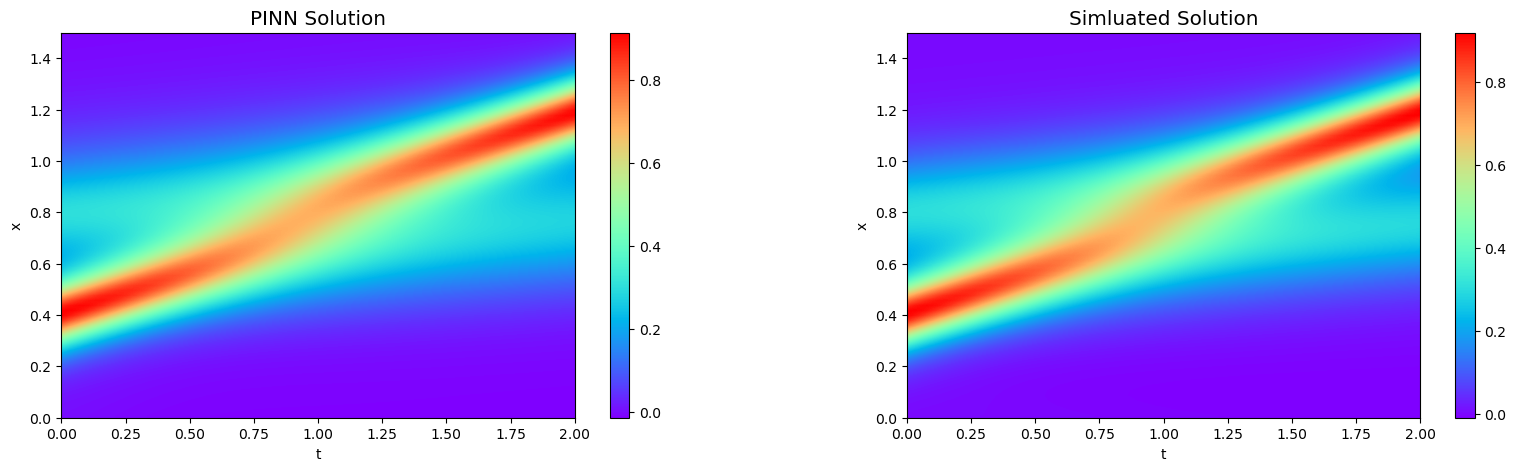

In [9]:
# plot & mse
fig = plt.figure(figsize=(20, 5))
u_viz = (u.reshape(201, 77)).T 
ext = [0 ,2, 0., 1.5]     # plot boundary  
ax1 = fig.add_subplot(1,2,1)
mesh =ax1.imshow(u_viz, interpolation='bilinear', origin='lower', cmap='rainbow', extent=ext, aspect=1); 
plt.colorbar(mesh) 
plt.xlabel('t'); plt.ylabel('x'); 
plt.title('PINN Solution', fontsize='x-large'); 

u_true = (batch_y.reshape(201, 77)).T 
ext = [0 ,2, 0., 1.5]     # plot boundary    
ax2 = fig.add_subplot(1,2,2)
mesh2 = ax2.imshow(u_true, interpolation='bilinear', origin='lower', cmap='rainbow', extent=ext, aspect=1); 
plt.colorbar(mesh2); 
plt.xlabel('t'); plt.ylabel('x'); 
plt.title('Simluated Solution', fontsize='x-large'); 

jnp.mean((u_viz - u_true)**2)

Write PINN prediction & ground truth to file

In [10]:
#np.save('kdv_cma_60s', (u_viz, u_true))